In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA

In [2]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/seasonal_rainfall_agg.csv'
rainfall = pd.read_csv(file_path)
rainfall

,Unnamed: 0,loc_id,latitude,longitude,MAM,JJA,SON
0,0,0,3.0,33.0,27.610630,31.365070,24.972204
1,1,1,3.0,33.5,26.281088,31.178913,20.268501
2,2,2,3.0,34.0,23.993891,29.477806,16.252021
3,3,3,3.0,34.5,21.138449,24.985073,13.394888
4,4,4,3.0,35.0,16.771113,17.162890,9.135349
...,...,...,...,...,...,...,...
770,770,770,15.0,46.0,2.395008,1.058037,0.294778
771,771,771,15.0,46.5,1.472659,1.153102,0.325222
772,772,772,15.0,47.0,1.785098,3.216337,1.181444
773,773,773,15.0,47.5,2.379334,3.724557,1.564208


In [9]:
data = rainfall[['SON', 'JJA', 'MAM']].copy()
data.var()

SON    200.811709
JJA    664.306626
MAM    151.330299
dtype: float64

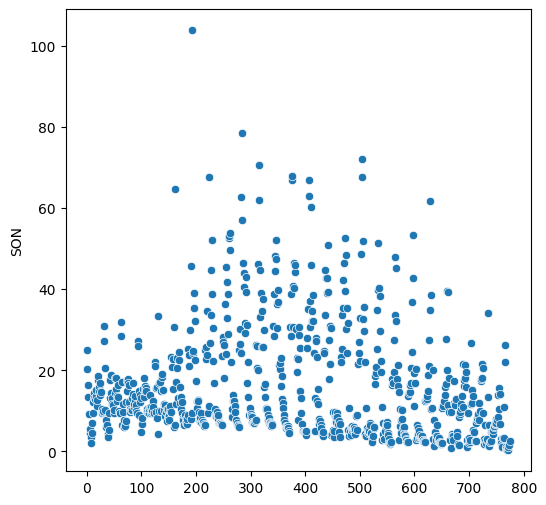

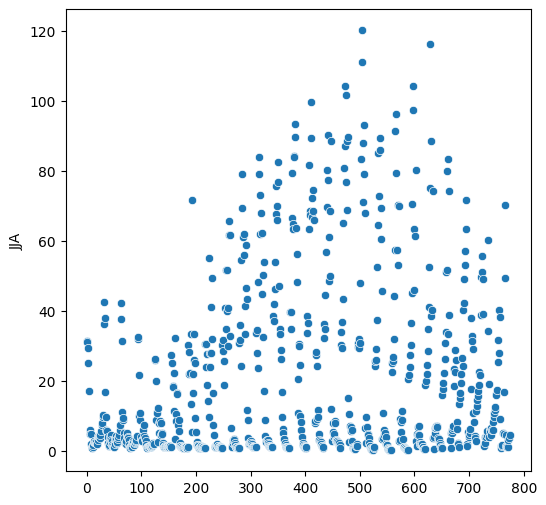

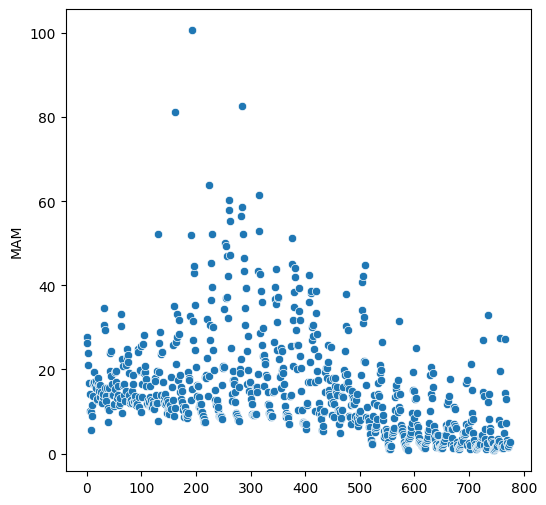

In [10]:
cols = [col for col in data.columns if data[col].dtype in ['int64','float64']]

for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=np.array(data.index), y=col, data=data)
    plt.show

# PCA

In [11]:
data_norm = data - data.mean(axis=0)

pca = PCA()

data_pca = pca.fit_transform(data_norm)
names = [f"PC{i+1}" for i in range(data_pca.shape[1])]
data_pcadf = pd.DataFrame(data_pca, columns=names)

print(data_pcadf.head(10))
print(" ")
print("shape of pca df:", data_pcadf.shape)

         PC1       PC2       PC3
0  16.539668  8.266649 -2.319829
1  13.931742  5.444705 -5.346793
2  10.066752  2.840475 -6.939586
3   4.174510  1.543096 -6.623831
4  -5.598987  0.044933 -5.825017
5 -18.958266 -1.832733 -3.157907
6 -18.372208  2.241438 -4.279177
7 -20.579544 -1.945785 -3.588054
8 -24.746653 -4.468879 -1.758606
9 -23.579876 -0.541796 -1.405214
 
shape of pca df: (775, 3)


# PCA from Scratch

In [13]:
cov_matrix = np.cov(data_norm.T)
print("Convariance matrix: \n")
print(cov_matrix)

Convariance matrix: 

[[200.81170926 303.86760689 139.72466803]
 [303.86760689 664.30662585 166.96673089]
 [139.72466803 166.96673089 151.33029923]]


In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvectors: \n", eigenvectors)
print("\nEigenvalues: \n", eigenvalues)


Eigenvectors: 
 [[-0.4412445  -0.80605563  0.39443328]
 [-0.85220809  0.23867822 -0.46559004]
 [-0.28114884  0.54157827  0.79224258]]

Eigenvalues: 
 [876.72236786  16.9553866  122.77087989]


In [15]:
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort()
eig_pairs.reverse()

print(eig_pairs)

eigenvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# print sorted eigan values
print("\nSorted eigan values:\n", eigenvalues_sorted)

[(876.7223678580339, array([-0.4412445 , -0.85220809, -0.28114884])), (122.77087988983624, array([ 0.39443328, -0.46559004,  0.79224258])), (16.95538659566115, array([-0.80605563,  0.23867822,  0.54157827]))]

Sorted eigan values:
 [876.7223678580339, 122.77087988983624, 16.95538659566115]


In [16]:
total = sum(eigenvalues_sorted)
var_explained = [(i/total) for i in eigenvalues_sorted]

cum_var_exp = np.cumsum(var_explained)

In [17]:
vect = np.array(eigenvectors_sorted) 

# dot product to create principal components analysis
data_vect_pca = np.dot(data_norm,vect.T)

pd.DataFrame(data_vect_pca)

,0,1,2
0,-16.539668,8.266649,2.319829
1,-13.931742,5.444705,5.346793
2,-10.066752,2.840475,6.939586
3,-4.174510,1.543096,6.623831
4,5.598987,0.044933,5.825017
...,...,...,...
770,27.266351,-7.333186,1.321346
771,27.431221,-8.096163,0.819972
772,25.207269,-8.471535,0.791469
773,24.438199,-8.086403,0.926066


In [18]:
evr = pca.explained_variance_ratio_
print(evr)

[0.86253485 0.12078415 0.01668101]


<function matplotlib.pyplot.show(close=None, block=None)>

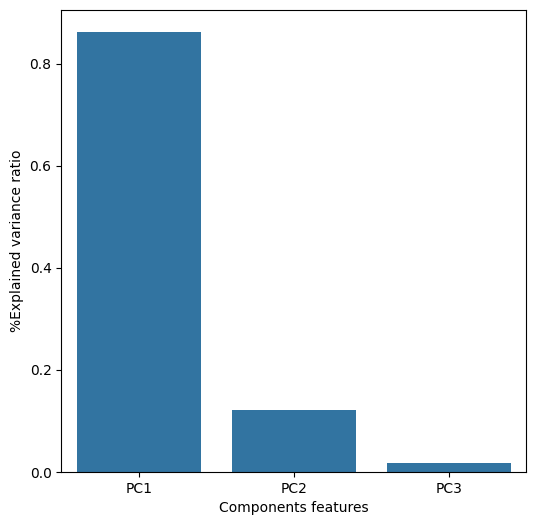

In [19]:

features = ['PC1', 'PC2', 'PC3']
    
# plot the EVR using matplotlib pyplot    
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show

In [20]:
ev = pca.explained_variance_
print(ev)

[876.72236786 122.77087989  16.9553866 ]


<function matplotlib.pyplot.show(close=None, block=None)>

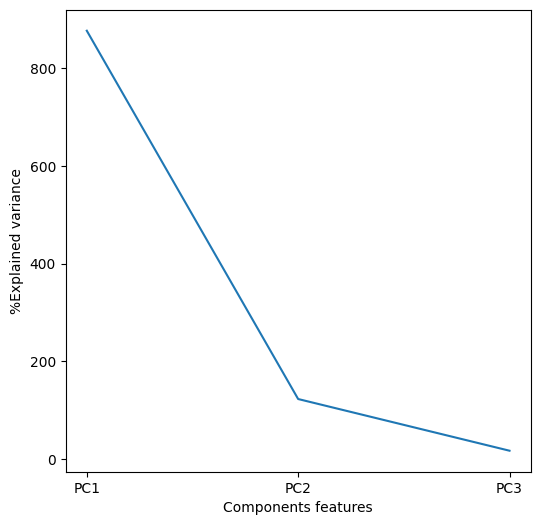

In [21]:
features = ['PC1', 'PC2', 'PC3']

plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=ev)
plt.xlabel("Components features")
plt.ylabel("%Explained variance")
plt.show

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas import crosstab
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import minmax_scale

In [ ]:
# matplotlib defaults
from google.colab import drive
drive.mount('/content/drive')

cara = pd.read_csv('/content/drive/MyDrive/UniTS/CodeProjects/Unsupervised_Learning/data/cara.csv')
cara

In [2]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/seasonal_rainfall_agg.csv'
rainfall = pd.read_csv(file_path)
rainfall

,Unnamed: 0,loc_id,latitude,longitude,MAM,JJA,SON
0,0,0,3.0,33.0,27.610630,31.365070,24.972204
1,1,1,3.0,33.5,26.281088,31.178913,20.268501
2,2,2,3.0,34.0,23.993891,29.477806,16.252021
3,3,3,3.0,34.5,21.138449,24.985073,13.394888
4,4,4,3.0,35.0,16.771113,17.162890,9.135349
...,...,...,...,...,...,...,...
770,770,770,15.0,46.0,2.395008,1.058037,0.294778
771,771,771,15.0,46.5,1.472659,1.153102,0.325222
772,772,772,15.0,47.0,1.785098,3.216337,1.181444
773,773,773,15.0,47.5,2.379334,3.724557,1.564208


In [3]:
X = np.array(rainfall[['SON', 'JJA', 'MAM']])

In [4]:
y = np.ones(X.shape[0], dtype=int)

[Text(0.5, 1.0, 'Rainfall Seasonal')]

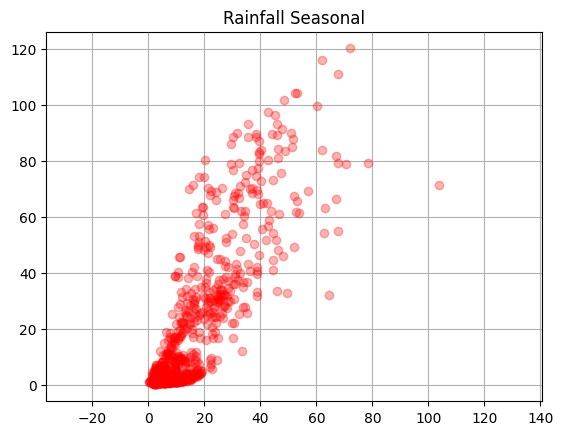

In [5]:
def plotblobs(X,y,n_clusters):
    #cor = 10*['red','blue','green']
    cor = 10*["g","r","c","b","m"]
    for k in range(n_clusters):
        idx = np.where(y==k)
        ax.scatter(X[idx,0],X[idx,1],c=cor[k],zorder=3,
                marker='o',alpha=0.3)
    ax.axis('equal')
    ax.grid(visible=True,zorder=1)
    
    
np.random.seed(91)
n_clusters = 5
n_samples = X.shape[0]

#[X,y] = make_blobs(n_samples = n_samples, n_features=2, 
#                   centers = [[-2,3],[0,0],[.5,2]], 
#                   cluster_std = [[1,.5],[.1,.8],[.1,.5]])

#X = minmax_scale(X,feature_range=(0,1))

ax = plt.axes()
plotblobs(X,y,n_clusters)
ax.set(title='Rainfall Seasonal')

In [6]:
np.random.seed(911)

max_iterations = 1000

tol = 1e-8 

# stop criterion
# 0 - Norm of medoids
# 1 - Decreasing cost 
stop_criterion = 1

# random initial medoids
medoids = np.random.permutation(n_samples)[:n_clusters]
initial_medoids = np.copy(medoids) 

In [7]:

cost = []
for i in range(max_iterations): 

    oldl2norm = np.linalg.norm(X[medoids])
    d2m = pairwise_distances(X, X[medoids])
    kmedoids_cluster = np.argmin(d2m,axis=1)

    cost.append(0)   
    for k in range(n_clusters):

        idx_cluster_samples = np.where(kmedoids_cluster==k)[0]
        p2p = pairwise_distances(X[idx_cluster_samples])

        intra_cluster_dispersion = np.sum(p2p,axis=1)
        idx = np.argmin(intra_cluster_dispersion)
    
        cost[i] = cost[i] + intra_cluster_dispersion[idx]
    
        medoids[k] = idx_cluster_samples[idx]
    
    newl2norm = np.linalg.norm(X[medoids])

    if(stop_criterion==1):
        if((abs(oldl2norm-newl2norm)/oldl2norm)<tol):
            break
    else:
        if(cost[i]>=cost[i-1]):
            break
             

Text(0, 0.5, 'Cost')

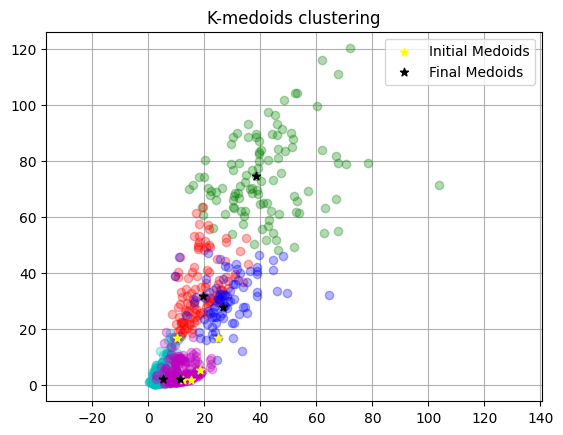

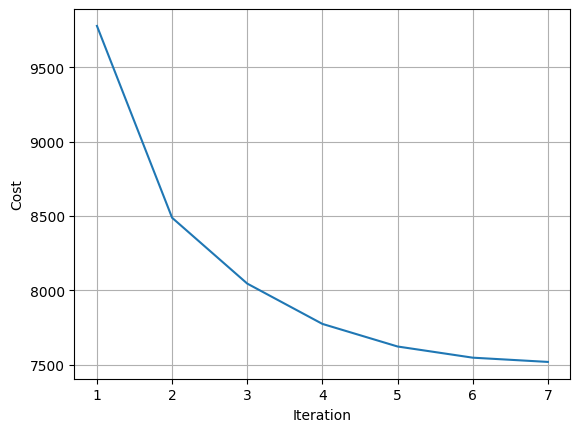

In [8]:
plt.figure()
ax = plt.axes()
plotblobs(X,kmedoids_cluster,n_clusters)

# plots initial and final medoids
ax.scatter(X[initial_medoids,0],X[initial_medoids,1],marker='*',c='yellow',zorder=4, label='Initial Medoids')
ax.scatter(X[medoids,0],X[medoids,1],marker='*',c='black',zorder=4, label='Final Medoids')
ax.legend(loc='upper right')
ax.set(title='K-medoids clustering')

plt.figure()
plt.plot(cost)
plt.grid(visible=True)
plt.xlabel('Iteration')
L = list(range(i+1))
rotulos = L+np.ones([1,len(L)])
plt.xticks(ticks=L,labels=[int(k) for k in list(rotulos[0])])
plt.ylabel('Cost')

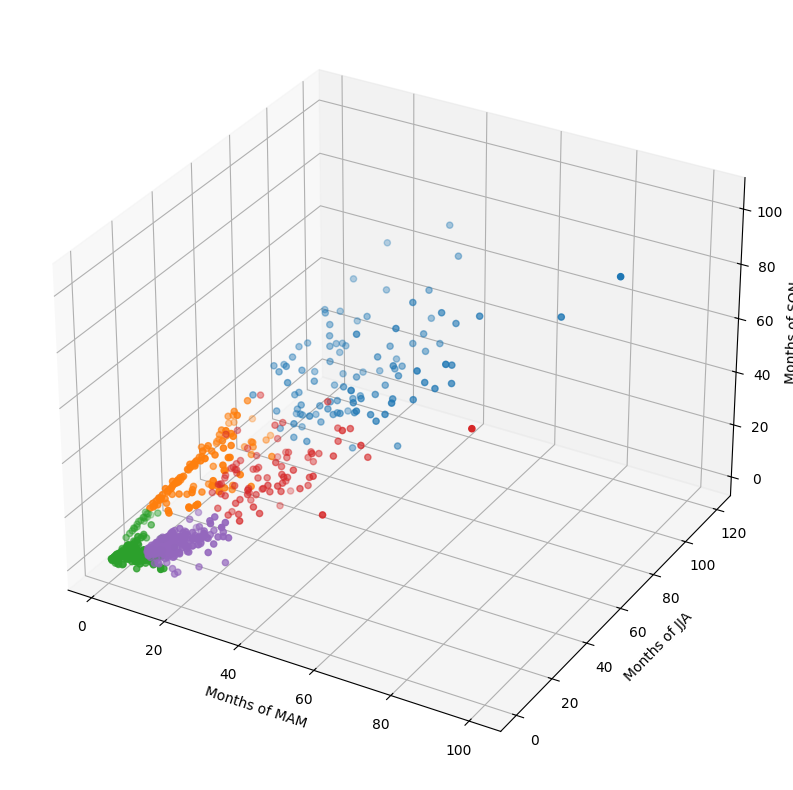

In [9]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

c_labels = kmedoids_cluster
for num in np.unique(c_labels): 
    ax.scatter(X[c_labels==num,2], X[c_labels==num,1], X[c_labels==num,0], s = 20 , label = f"Cluster {num}")
 
ax.set_xlabel('Months of MAM')
ax.set_ylabel('Months of JJA')
ax.set_zlabel('Months of SON')
plt.show()